In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# PEPITO data previewer

From data taken on La Palma, *pt0_5m*, binned $2\times2$ so $400\,\textrm{mas}$ pixels.

In [2]:
src_dir="/run/media/omartin/HDD_OBM/PEPITO_DATA"
usableFNRE=r"2019_07_22_02_.._.._pepito.fits"

### Imports

In [3]:
import os,re
#from ipywidgets import IntProgress,IntText,HBox,Layout,Output
from ipywidgets import SelectMultiple
from IPython.display import display
from astropy.io import fits as astropyfits

### Show file names to view

In [8]:
fNames=os.listdir(src_dir)
usableFNames=[ fn for fn in fNames if re.search(usableFNRE,fn)]
usableFNames.sort()
#
usableFiles = SelectMultiple(layout={'border': '1px solid black'},options=usableFNames)
display(usableFiles)

SelectMultiple(layout=Layout(border='1px solid black'), options=('2019_07_22_02_08_34_pepito.fits', '2019_07_2…

In [9]:
chosenFNames=[ usableFNames[idx] for idx in usableFiles.get_state()['index'] ]
if len(chosenFNames):
    print("Following files to load:")
    for fn in chosenFNames:
        print("\t"+fn)
else:
    print("*No files chosen*")

*No files chosen*


### Process chosen files

Grab basic information on the first HDU and eliminate unsuitable candidates: different number of axes from first and last two axes are different.

In [6]:
if not len(chosenFNames):
    raise ValueError("No files chosen")
fits={}
usefulFNames=[]
firstNAxes=None
for fn in chosenFNames:
    fits[fn]={'fits':astropyfits.open(src_dir+"/"+fn) for fn in chosenFNames}
    naxis=fits[fn]['fits'][0].header['NAXIS']
    naxes={}
    for i in range(naxis):
        naxes[i+1]=fits[fn]['fits'][0].header['NAXIS{:d}'.format(i+1)]
    fits[fn]['naxes']=naxes
    fits[fn]['naxis']=naxis
    #
    if firstNAxes is None:
        firstNAxis,firstNAxes=naxis,naxes
        usefulFNames.append(fn)
    else:
        if naxis==firstNAxis and naxis==3:
            if naxes[1]==firstNAxes[1] and naxes[2]==firstNAxes[2]:
                usefulFNames.append(fn)
            else:
                print("REJECTED: "+fn+", incompatible axis size for #2 and/or #3")
        else:
            print("REJECTED: "+fn+", wrong # axes")
            

ValueError: No files chosen

### Stack each set of frames

Create a stacked image for each filename and display

In [7]:
totallyStacked=0
for fn in usefulFNames:
    try:
        fits[fn]['stacked']=fits[fn]['fits'][0].data.copy().sum(0)
    except ValueError:
        print("Is "+fn+" closed?")
    else:
        totallyStacked+=fits[fn]['stacked']
        print(fn,fits[fn]['stacked'].shape)
        #
        fits[fn]['fits'].close()

NameError: name 'usefulFNames' is not defined

In [45]:
print(fits[fn]['fits'][0].header['EXP'])

0.03


<IPython.core.display.Javascript object>


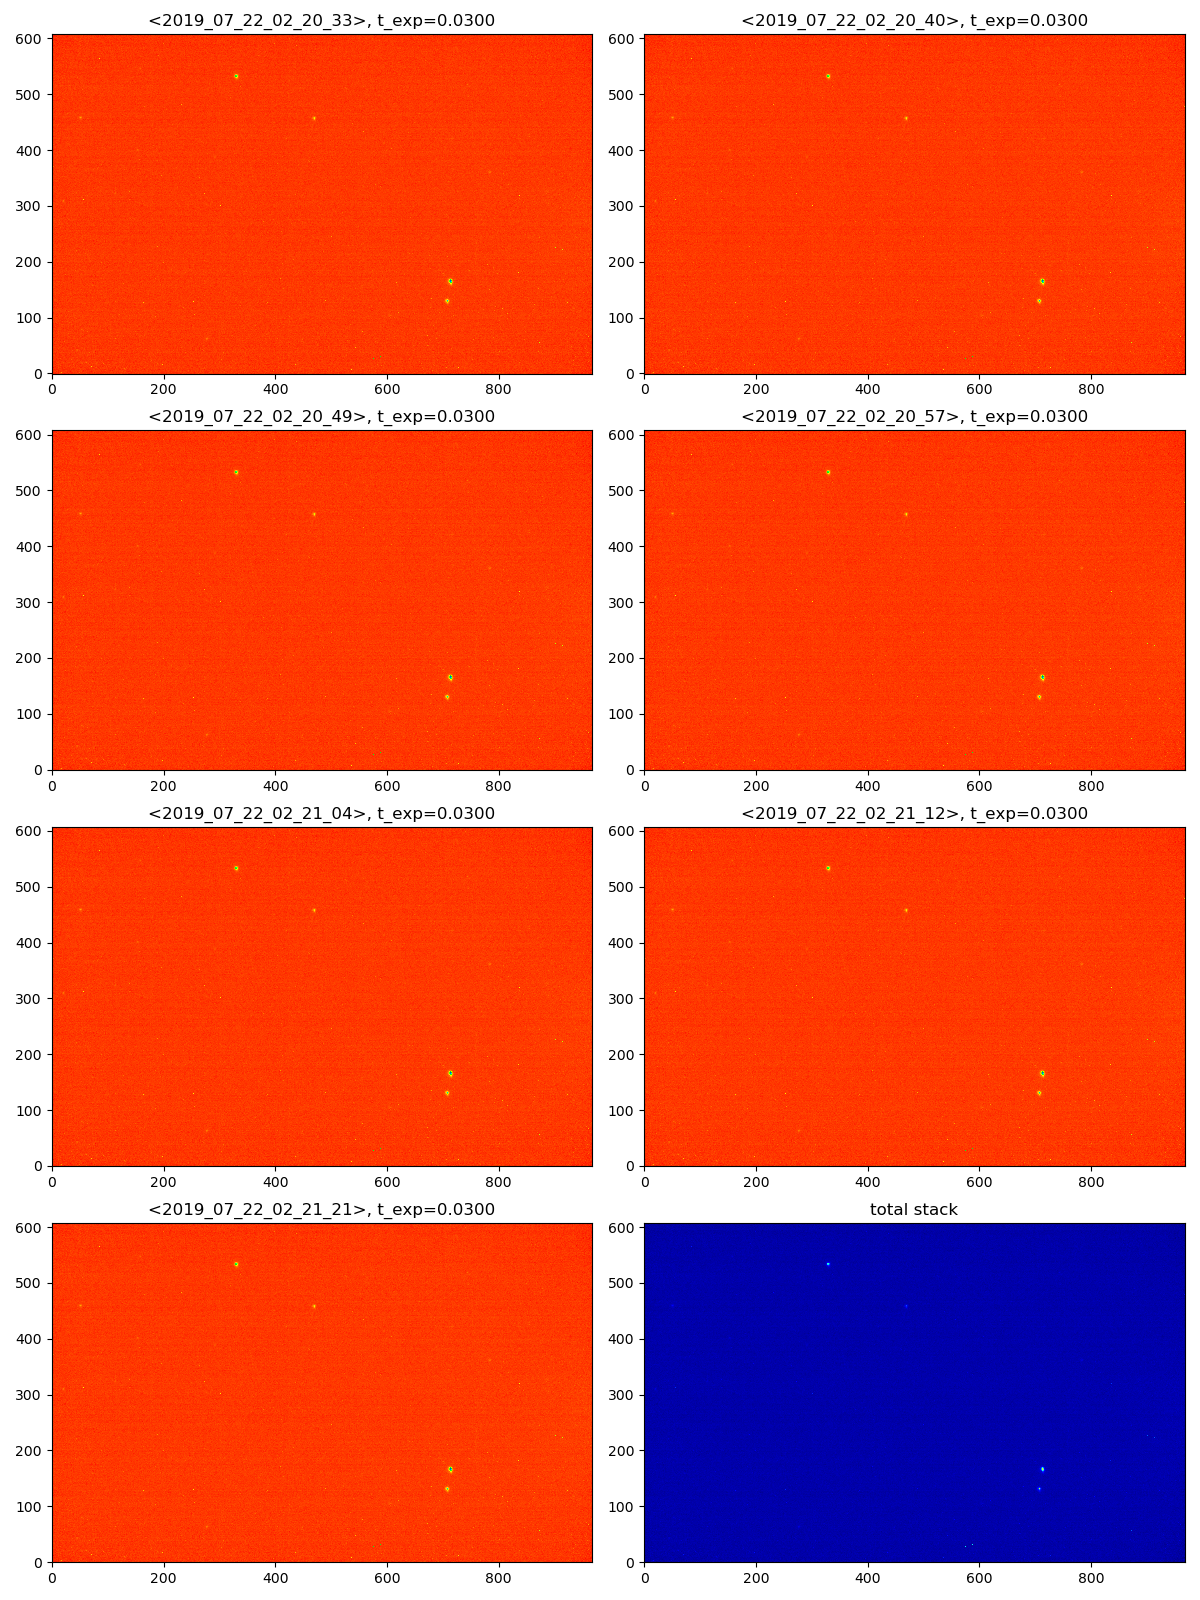

In [50]:
%matplotlib notebook
from matplotlib import pyplot
import numpy
#
pyplot.figure(1,figsize=(12,2*len(usefulFNames)+2))
for spIdx,fn in enumerate(usefulFNames):
    pyplot.subplot(int(numpy.ceil(len(usefulFNames)+1)/2),2,spIdx+1)
    pyplot.imshow(fits[fn]['stacked']**0.5,aspect=1,origin='bottom',cmap='hsv')
    pyplot.title("<{:s}>, t_exp={:.4f}".format( fn.strip("_pepito.fits"), fits[fn]['fits'][0].header['EXP'] ))

pyplot.subplot(int(numpy.ceil(len(usefulFNames)+1)/2),2,spIdx+2)
pyplot.imshow(totallyStacked**0.5,aspect=1,origin='bottom',cmap='jet')
pyplot.title("total stack")

    
pyplot.tight_layout()